In [50]:
import os, sys
import numpy as np
import EMdata
import torch
import itertools
import random, math
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import time

In [51]:
#GPU or CPU
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  
device = torch.device(dev) 

In [52]:
#data path
file_path0='F:/script/image_simulate_data/10230/29_38/job029.star'
file_path1='F:/script/image_simulate_data/10230/29_38/job038.star'
datatype0=0  #0 is relion 3.1, 1 is relion 3, 2 is cryosparc
datatype1=0
block_size=64

output_path=os.path.dirname(file_path0)+'_mix'
if os.path.isdir(output_path) is False:
    os.mkdir(output_path)

In [294]:
if datatype0<2:
    file_info0=EMdata.read_relion(file_path0)
    if datatype0==0:
        #read data (relion3.1)
        dataset0=file_info0.getRdata_31()
        optics0=file_info0.extractoptic()
    else:
        #read relion 3.0
        dataset0=file_info0.getRdata()
    metadata0=dataset0[0]
    print(metadata0)
    data0=dataset0[1]
    print(data0[0])
    corpus_information0=EMdata.process_helical(dataset0).extarct_helical_select()
else:
    #read cryosparc
    dataset=np.load(file_path)
    corpus_information=EMdata.process_cryosparc_helical(dataset0).extract_helical()
corpus_dic0=corpus_information0[0]
corpus0=list(corpus_dic0.values())
corpus_backup0=corpus0[:]

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnHelicalTrackLengthAngst', '_rlnAnglePsiFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnOpticsGroup', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift']
['1620.730741', '3260.084860', '1', '90.000000', '-6.62403', '0.000000', '0.500000', '000001@Extract/job241/Case2/FoilHole_24944508_Data_24944178_24944179_20190126_0155-129698.mrcs', 'Case2/FoilHole_24944508_Data_24944178_24944179_20190126_0155-129698.mrc', '1', '3.306912', '0.378260', '24655.039062', '24140.251953', '-46.80159', '0.000000', '1.000000', '0.000000']


ValueError: '_rlnClassNumber' is not in list

In [ ]:
if datatype1<2:
    file_info1=EMdata.read_relion(file_path1)
    if datatype1==0:
        #read data (relion3.1)
        dataset1=file_info1.getRdata_31()
        optics1=file_info1.extractoptic()
    else:
        #read relion 3.0
        dataset1=file_info1.getRdata()
    metadata1=dataset1[0]
    print(metadata1)
    data1=dataset1[1]
    print(data1[0])
    corpus_information1=EMdata.process_helical(dataset1).extarct_helical_select()
else:
    #read cryosparc
    dataset=np.load(file_path)
    corpus_information=EMdata.process_cryosparc_helical(dataset).extract_helical()
corpus_dic1=corpus_information1[0]
corpus1=list(corpus_dic1.values())
corpus_backup1=corpus1[:]

In [74]:
#custom dataset
file_info1=EMdata.read_relion(file_path0).getRdata()
file_info2=EMdata.read_relion(file_path1).getRdata()
print(file_info1[0])
print(len(file_info1[1]),len(file_info2[1]))

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnHelicalTrackLength', '_rlnAnglePsiFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnMagnification', '_rlnDetectorPixelSize', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnVoltage', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnSphericalAberration', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift', '_rlnAmplitudeContrast']
63184 198021


In [79]:
def count_filament(file_info):
    fid=file_info[0].index('_rlnHelicalTubeID')
    mid=file_info[0].index('_rlnImageName')
    filament_length=[]
    filament_id=[]
    for i in range(len(file_info[1])):
        index=file_info[1][i][fid]+'-'+file_info[1][i][mid][7:]
        if index in filament_id:
            idx=filament_id.index(index)
            number=filament_length[idx]
            filament_length[idx]=number+1
            continue
        else:
            filament_id.append(index)
            filament_length.append(1)
    return filament_length

def arrange_filament(mrcfile,filament_length):
    count=0
    all_data=[]
    for i in range(len(filament_length)):
        all_data.append(mrcfile[count:count+filament_length[i]])
        count=count+filament_length[i]-1
    return all_data

In [114]:
predict=np.load('F:/script/image_simulate_data/10340/241_242/assignment_16_20.npy
def assign_2Dclass(predict,filament_length):
    all_data=[]
    count=0
    print(len(filament_length))
    for i in range(len(filament_length)):
        filament_data=[]
        for j in range(filament_length[i]):
            filament_data.append(predict[count])
            count+=1
        all_data.append(filament_data)
    print(count)
    return all_data
as0=predict[:len(file_info1[1])]
as1=predict[len(file_info1[1]):]

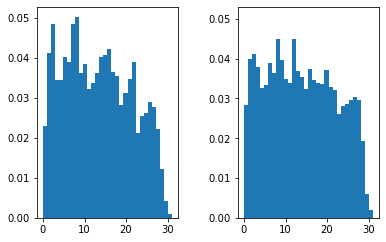

In [81]:

bins=max(len(np.unique(as0)),len(np.unique(as1)))
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(as0,density=True,bins=bins)
ax2.hist(as1,density=True,bins=bins)
ax2.set_ylim(0,0.053)
f.tight_layout(pad=3.0)
plt.savefig(output_path+"/assignment_distribution",bbox_inches='tight', pad_inches=0.01)

In [82]:
data0=assign_2Dclass(predict[0:len(file_info1[1])],count_filament(file_info1))
data1=assign_2Dclass(predict[len(file_info1[1]):],count_filament(file_info2))
print(count_filament(file_info1))
print(count_filament(file_info2))

1223
63184
3443
198021
[13, 121, 18, 9, 123, 29, 19, 32, 23, 54, 35, 44, 33, 46, 29, 49, 27, 20, 165, 11, 23, 21, 16, 19, 46, 15, 145, 82, 19, 19, 29, 36, 16, 20, 27, 1, 47, 43, 42, 28, 100, 24, 108, 6, 31, 59, 46, 49, 46, 29, 38, 62, 63, 50, 40, 9, 23, 41, 13, 34, 42, 54, 81, 48, 39, 22, 7, 43, 2, 35, 44, 24, 39, 43, 105, 32, 47, 34, 29, 122, 95, 108, 55, 48, 92, 51, 69, 38, 59, 38, 50, 45, 28, 28, 22, 76, 71, 24, 46, 49, 42, 2, 26, 12, 14, 22, 78, 44, 102, 44, 51, 25, 17, 32, 31, 72, 34, 28, 13, 53, 51, 88, 54, 96, 20, 67, 53, 35, 25, 41, 34, 95, 77, 43, 33, 49, 54, 90, 39, 43, 23, 53, 22, 57, 63, 44, 49, 63, 26, 12, 101, 31, 48, 45, 134, 74, 53, 38, 38, 25, 75, 51, 26, 73, 52, 28, 22, 9, 16, 94, 13, 63, 15, 33, 58, 47, 28, 108, 17, 45, 67, 46, 38, 46, 13, 22, 32, 33, 18, 2, 32, 55, 81, 51, 52, 18, 22, 28, 19, 21, 88, 88, 36, 16, 69, 18, 21, 38, 33, 36, 73, 10, 46, 43, 28, 30, 43, 50, 83, 31, 31, 21, 23, 64, 81, 54, 14, 52, 72, 46, 35, 114, 25, 79, 63, 77, 44, 31, 6, 28, 50, 121, 55,

In [83]:
corpus_all=data0+data1

In [84]:
corpus_ignore_old=corpus_all

In [154]:
corpus_ignore_0=[]
for i in range(len(corpus0)):
    corpus_row=[]
    count=1
    lst=corpus0[i]
    for j in range(len(lst)):
        particle=lst[j]
        if j==0:
            count+=particle[1]-1
        if count==int(particle[1]):
            corpus_row.append(str(particle[0]))
            count+=1
        else:
            while 1:
                if count==int(lst[j][1]):
                    corpus_row.append(str(particle[0]))
                    count+=1
                    break
                corpus_row+=['0']
                count+=1               
    corpus_ignore_0.append(corpus_row)

NameError: name 'corpus0' is not defined

In [ ]:
vocabulary0 = set(itertools.chain.from_iterable(corpus_ignore_0))
vocabulary_size0 = len(vocabulary0)
print(vocabulary_size0)
count0=dict(Counter([x for lst in corpus_ignore_0 for x in lst]))
count0=np.array(list(count0.items()),dtype='i')

In [ ]:
corpus_ignore_1=[]
for i in range(len(corpus1)):
    corpus_row=[]
    count=1
    lst=corpus1[i]
    for j in range(len(lst)):
        particle=lst[j]
        if j==0:
            count+=particle[1]-1
        if count==int(particle[1]):
            corpus_row.append(str(particle[0]+vocabulary_size0))
            count+=1
        else:
            while 1:
                if count==int(lst[j][1]):
                    corpus_row.append(str(particle[0]+vocabulary_size0))
                    count+=1
                    break
                corpus_row+=['0']
                count+=1               
    corpus_ignore_1.append(corpus_row)

In [85]:
#corpus_ignore_old=corpus_ignore_0+corpus_ignore_1
#data=data0+data1
vocabulary = set(itertools.chain.from_iterable(corpus_ignore_old))
vocabulary_size = len(vocabulary)
print(vocabulary_size)
#count1=dict(Counter([x for lst in corpus_ignore_old[len(corpus_ignore_0):] for x in lst]))
#count1=np.array(list(count1.items()),dtype='i')

32


In [86]:
word_to_index = {str(w): idx for (idx, w) in enumerate(vocabulary)}
index_to_word = {idx: str(w) for (idx, w) in enumerate(vocabulary)}

In [ ]:
filament_n_0=len(corpus_ignore_0)
data_length=len(data0)+len(data1)
def mix_random(corpus_list, filament_n_0, length, percent, count0,count1):
    random_items=random.sample(list(range(length)),round(length*percent/100))
    pop0=count0[:,0]
    pop1=count1[:,0]
    p0=count0[:,1]/count0[:,1].sum()
    p1=count1[:,1]/count1[:,1].sum()
    count=0
    for i in range(filament_n_0):
        lst=corpus_list[i]
        for j in range(len(lst)):
            if count in random_items:
                corpus_list[i][j]=random.choices(pop1,p1)[0]
                #print(i,j,random.choices(pop1,p1)[0])
            count+=1
            if count%10000==0:
                print(count)
    for i in range(filament_n_0,len(corpus_list)):
        lst=corpus_list[i]
        for j in range(len(lst)):
            if count in random_items:
                corpus_list[i][j]=random.choices(pop0,p0)[0]
            count+=1
            if count%10000==0:
                print(count)
    return corpus_list
percent=40
corpus_ignore=mix_random(corpus_ignore_old,filament_n_0,data_length,percent,count0, count1)

In [87]:
corpus_ignore=corpus_ignore_old

In [88]:
times=0
for i in range(len(corpus_ignore)):
    for j in range(len(corpus_ignore[i])):
        if type(corpus_ignore[i][j]) is str:
            times+=1
        corpus_ignore[i][j]=str(corpus_ignore[i][j])

In [89]:
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer
if os.path.isdir(output_path+"/corpus") is False:
    os.mkdir(output_path+"/corpus")
paths = [str(x) for x in Path(output_path+"/corpus/").glob("**/*.txt")]

# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=vocabulary_size, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
if os.path.isdir(output_path+"/tokens") is False:
    os.mkdir(output_path+"/tokens")
if os.path.isdir("./tokens") is False:
    os.mkdir("./tokens")
tokenizer.save_model(output_path+"/tokens")
tokenizer.save_model("./tokens")

['./tokens\\vocab.json', './tokens\\merges.txt']

In [90]:
print(corpus_ignore[1])

['27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '27.0', '4.0', '4.0', '4.0', '4.0', '9.0', '9.0', '15.0', '10.0', '19.0', '2.0', '4.0', '4.0', '4.0', '4.0', '4.0', '25.0', '4.0', '5.0', '5.0', '25.0', '5.0', '21.0', '21.0', '21.0', '21.0', '21.0', '21.0', '21.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '25.0', '25.0', '5.0', '5.0', '13.0', '13.0', '13.0', '13.0', '5.0', '21.0', '21.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '22.0', '17.0', '25.0', '25.0', '25.0', '25.0', '6.0', '25.0', '6.0', '4.0', '6.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '2.0', '2.0', '2.0', '15.0', '15.0', '15.0', '15.0', '15.0', '15.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '7.0', '6.0', '6.0', '7.0', '6.0', '6.0', '6.0', '6.0', '6.0']


In [91]:
import json

with open(output_path+'/tokens/vocab.json') as f:
    decode = json.load(f)
encode={value:key for (key, value) in decode.items()}
corpus_code=[]
for i in range(len(corpus_ignore)):
    lst=corpus_ignore[i]
    corpus_row=[]
    for j in range(len(lst)):
        corpus_row.append(encode[word_to_index[lst[j]]+5])
    corpus_code.append(corpus_row)
with open(output_path+"/corpus/helical.txt","w") as f:
    for i in range(len(corpus_code)):
        lst=corpus_code[i]
        for j in range(len(lst)):
            if j==len(lst)-1:
                f.write(lst[j]+'\n')
            else:
                f.write(lst[j])

In [92]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained(output_path+"/tokens", max_len=514)
#tokenizer.encode(encode[word_to_index['0']+5])

from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=50_000,
    max_position_embeddings=128,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)

In [93]:
%%time
from transformers import LineByLineTextDataset

data_import = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=output_path+"/corpus/helical.txt",
    block_size=block_size,
)

Wall time: 134 ms


In [94]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [95]:
from transformers import Trainer, TrainingArguments

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    train_dataset=data_import,
    prediction_loss_only=True,
)

D:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer.py:247: FutureWarning: Passing `prediction_loss_only` as a keyword argument is deprecated and won't be possible in a future version. Use `args.prediction_loss_only` instead.
  FutureWarning,


In [96]:
trainer.train()

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/584 [00:00<?, ?it/s]

{'loss': 3.633370849609375, 'learning_rate': 3.573059360730594e-05, 'epoch': 0.8561643835616438, 'step': 500}


D:\ProgramData\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Iteration:   0%|          | 0/584 [00:00<?, ?it/s]

{'loss': 2.429465576171875, 'learning_rate': 2.1461187214611872e-05, 'epoch': 1.7123287671232876, 'step': 1000}


Iteration:   0%|          | 0/584 [00:00<?, ?it/s]

{'loss': 1.83246533203125, 'learning_rate': 7.191780821917809e-06, 'epoch': 2.5684931506849313, 'step': 1500}


TrainOutput(global_step=1752, training_loss=2.4696998073630136)

In [97]:
trainer.save_model(output_path+"/tokens/")
trainer.save_model("./tokens/")

In [98]:
from transformers import pipeline

feature_extraction = pipeline(
    'feature-extraction',model="./tokens",tokenizer="./tokens")

In [99]:
def cut_corpus(corpus,cut_length):
    new_corpus=[]
    cut_length=cut_length
    print(len(corpus))
    for i in range(len(corpus)):
        lst=corpus[i]
        n=len(lst)
        if n<=cut_length:
            new_corpus.append(lst)
            continue
        if n%cut_length==0:
            cut_amount=int(n/cut_length)
        else:
            cut_amount=int((n-n%cut_length)/cut_length)+1
        print(n)
        for j in range(cut_amount-1):
            new_corpus.append(lst[j*cut_length:(j+1)*cut_length])
        new_corpus.append(lst[(cut_amount-1)*cut_length:])
    return new_corpus
corpus_code_cut=cut_corpus(corpus_code,block_size)

4666
121
123
165
145
82
100
108
81
105
122
95
108
92
69
76
71
78
102
72
88
96
67
95
77
90
101
134
74
75
73
94
108
67
81
88
88
69
73
83
81
72
114
79
77
121
199
155
76
106
69
73
88
153
77
127
78
85
74
95
120
69
120
66
67
113
138
88
82
75
72
134
67
70
72
68
81
97
86
125
81
79
78
81
76
98
101
118
73
66
81
75
102
119
128
69
87
68
87
131
66
65
117
122
88
104
137
97
126
67
90
101
89
80
88
100
78
68
104
115
108
130
67
104
72
99
73
72
112
120
94
86
76
69
119
68
90
71
81
86
82
85
87
65
88
109
120
73
66
88
92
89
85
77
116
65
65
83
117
71
65
119
93
88
73
75
89
73
70
67
180
65
99
69
69
67
68
71
105
79
96
65
69
87
106
74
82
96
88
73
95
77
111
85
88
82
113
65
98
113
89
71
71
66
94
111
113
93
82
88
92
102
171
102
165
179
74
68
142
67
93
79
86
72
114
66
108
96
68
125
82
119
109
67
67
91
65
81
96
99
79
77
90
132
66
111
100
81
105
121
92
117
71
73
94
107
77
65
70
81
77
72
76
140
72
110
135
122
73
99
73
82
72
95
106
71
77
146
84
71
111
65
110
68
109
84
75
91
81
108
82
74
65
84
94
93
81
67
68
90
67
84
66
6

In [100]:
filament_embeddings=[]
for i in range(len(corpus_code_cut)):
    if i%200==0:
        print(i)
    lst=list(np.squeeze(feature_extraction(''.join(corpus_code_cut[i])))[0])
    filament_embeddings.append(lst)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400


In [101]:
print(len(filament_embeddings))

6405


In [102]:
print(len(lst))

768


In [103]:
len(''.join(corpus_code_cut[77]))

43

In [104]:
import umap
import sklearn
from sklearn.cluster import KMeans,SpectralClustering,MeanShift, estimate_bandwidth,DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal 
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

In [105]:
filament_embeddings=np.array(filament_embeddings)
mask_1 = np.isfinite(filament_embeddings).all(axis=1)

In [106]:
label=[0]*118+[1]*135
label=np.array(label)

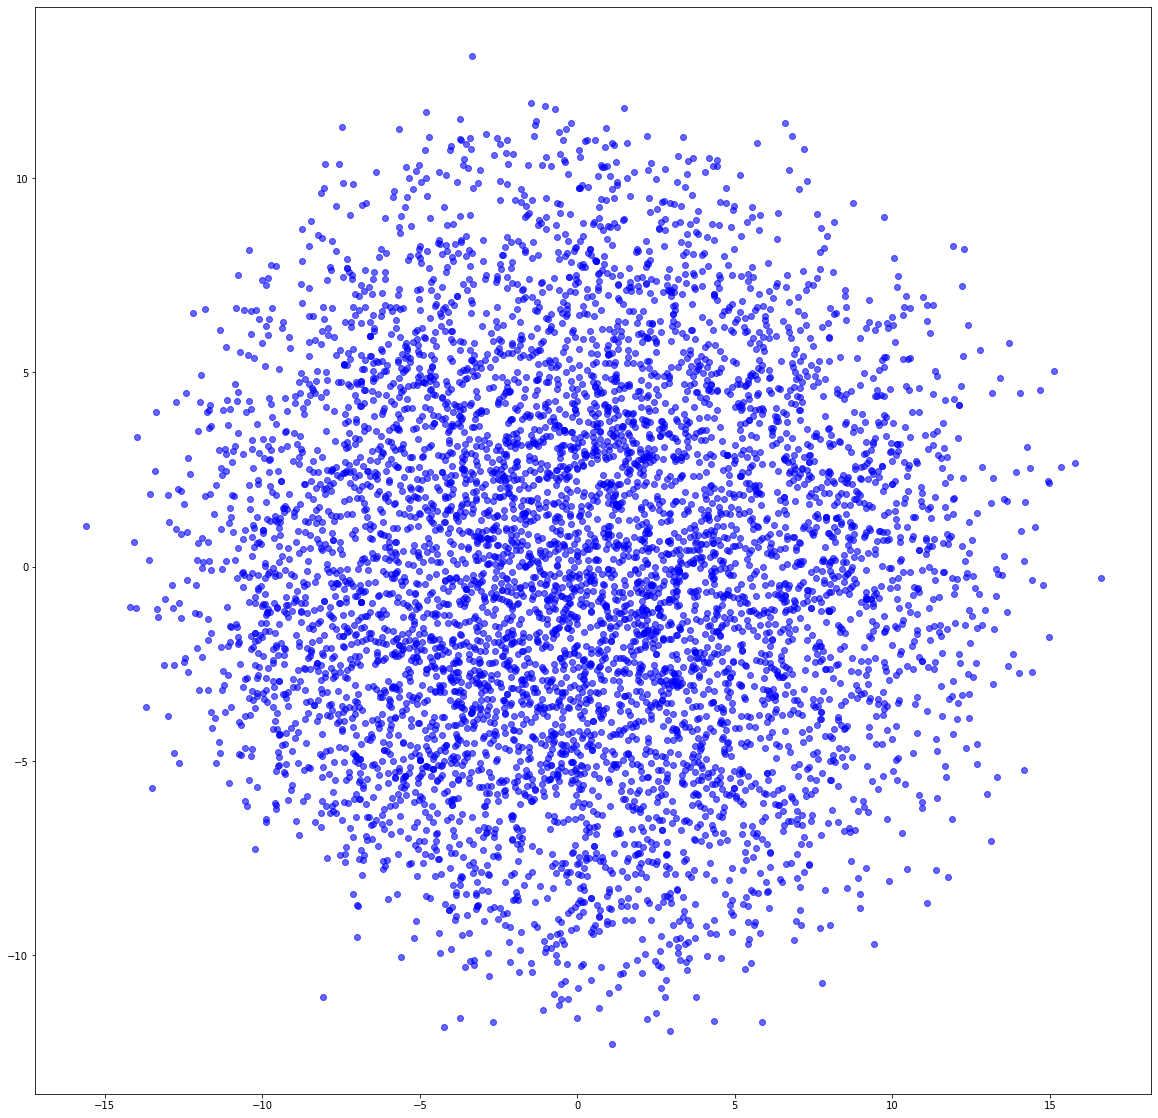

In [108]:
pca_sum = PCA(n_components=2).fit_transform(filament_embeddings)
#cluster_pca = KMeans(n_clusters=3).fit_predict(pca_sum[0:len(corpus)])
pca_sum_hD = PCA(n_components=30).fit_transform(filament_embeddings)

plt.figure(figsize = (20, 20))
plt.scatter(pca_sum[:,0], pca_sum[:,1],alpha=0.6,c='blue')
#plt.savefig(output_path+'/'+'mix'+str(percent)+"_bert_pca.png",bbox_inches='tight', pad_inches=0.01)
plt.show()


In [109]:
%%time
n_neighbors=10
min_dist=0.1
#umap_ND=umap.UMAP(n_neighbors=200,min_dist=0.4,n_components=100).fit_transform(filament_embeddings)
reducer = umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist)
umap_2D = reducer.fit_transform(filament_embeddings)
print('finish umap')

finish umap
Wall time: 16.5 s


In [110]:
filament_cluster_number=2
umap_predict=KMeans(n_clusters=filament_cluster_number).fit_predict(umap_2D)
#umap_predict=DBSCAN(eps=0.41, min_samples=100).fit_predict(umap_2D)+1
#filament_cluster_number=len(np.unique(umap_predict))

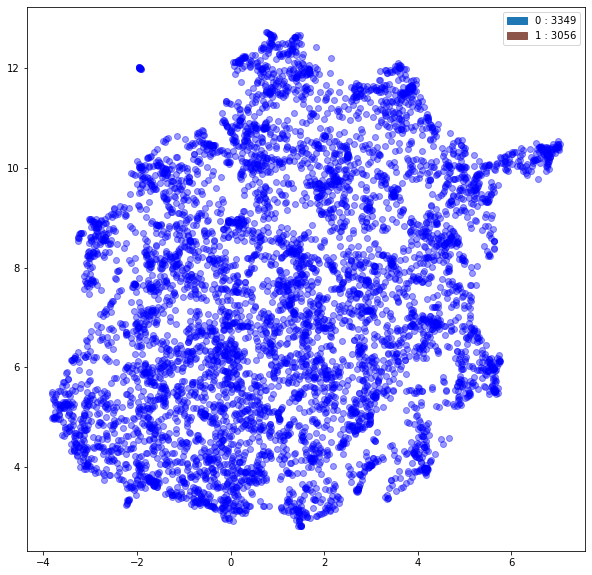

In [113]:
plt.figure(figsize = (10, 10))

for i in range(filament_cluster_number):
    locals()['labels'+str(i)]=mpatches.Patch(color=plt.cm.tab20((i)/filament_cluster_number), 
                                             label=str(i)+' : '+str(np.count_nonzero(umap_predict==i)))
plt.legend(handles=[eval('labels'+str(i)) for i in range(filament_cluster_number)])
#plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.6,c=plt.cm.tab20((umap_predict)/filament_cluster_number))
plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.4,c='blue')
#plt.xlim((-20,20))
#plt.ylim((-10,20))
plt.savefig(output_path+"/bert_umap_blue.png",bbox_inches='tight', pad_inches=0.01)
#c=plt.cm.tab20((umap_predict+1)/filament_cluster_number)

In [ ]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    cluster_nameID='clusterID'+str(i)
    locals()[cluster_name]=[]
    locals()[cluster_nameID]=[]
data_line=0
cluster_choice=umap_predict
positive_label=[]
for i in range(len(corpus_code_cut)):
    lst=corpus_code_cut[i]
    cluster_number=cluster_choice[i]
    cluster_name='cluster'+str(cluster_number)
    cluster_nameID='clusterID'+str(cluster_number)
    for j in range(len(lst)):
        locals()[cluster_name].append(data[data_line])
        locals()[cluster_nameID].append(data[data_line][8][18:21])
        data_line+=1
    positive_label.append(locals()[cluster_nameID][-1])
positive_label=np.array(positive_label)
labels=list(np.unique(positive_label))
positive_label_new=np.array([float(labels.index(x)) for x in positive_label])
labels_name=['data0','data1'] # define the type of filaments 
clustersize=[]
for i in range(filament_cluster_number):
    clustersize.append(len(locals()['cluster'+str(i)]))
print(clustersize)

In [ ]:
plt.figure(figsize = (20, 20))
for i in range(len(labels_name)):
    locals()['true_label'+str(i)]=mpatches.Patch(color=plt.cm.tab20(i/3), label=labels_name[i])
plt.legend(handles=[eval('true_label'+str(i)) for i in range(len(labels))])
print(len(positive_label))
plt.scatter(umap_2D[:,0], umap_2D[:,1],color=plt.cm.tab20(positive_label_new/3),alpha=0.6)
plt.savefig(output_path+'/'+'mix'+str(percent)+"%_umap_label_bert.png",bbox_inches='tight', pad_inches=0.01)

In [ ]:
distribution_hist_all=[]
for i in range(filament_cluster_number):
    distribution_hist=[]
    lst=locals()['clusterID'+str(i)]
    for j in range(len(labels)):
        group_percentage=lst.count(labels[j])/len(lst)
        distribution_hist.append(group_percentage)
    distribution_hist_all.append(distribution_hist)
print(distribution_hist_all)
print(len(data),len(cluster0),len(cluster1))

fig, ax = plt.subplots(1,filament_cluster_number,figsize = (5*filament_cluster_number,7))

for i in range(filament_cluster_number):
    ax[i].bar(range(len(labels)),distribution_hist_all[i],tick_label =labels_name)
    particle_number=len(locals()['cluster'+str(i)])
    ax[i].set_title('cluster{} amount: {}'.format(i,particle_number))
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+'distr_new_bert.png')
print('a')

In [ ]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    data_cluster=locals()[cluster_name]
    if datatype==0:
        output=EMdata.output_star(output_path+'/bert_'+file_name,i,data_cluster,metadata)
        output.opticgroup(optics)
        output.writecluster()
    elif datatype==1:
        output=EMdata.output_star(output_path+'/'+file_name,i,data_cluster,metadata)
        output.writemetadata()
        output.writecluster()